In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_63307_R')

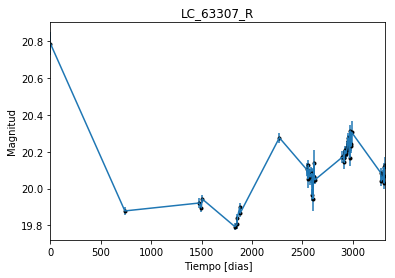

In [3]:
data = np.genfromtxt('LC_63307_R.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_63307_R')

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [6]:
%%capture capt
sample = model.run_mcmc(20000)

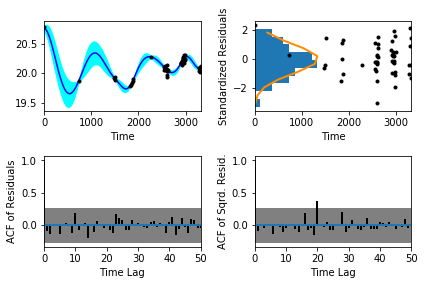

In [7]:
sample.assess_fit()

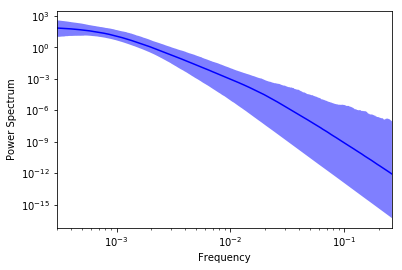

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [9]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_63307_R')

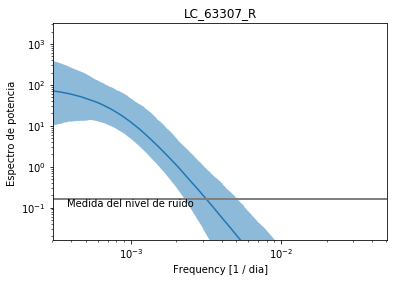

In [10]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_63307_R')

Text(0.5,1,'Prediccion , valor esperado LC_63307_R')

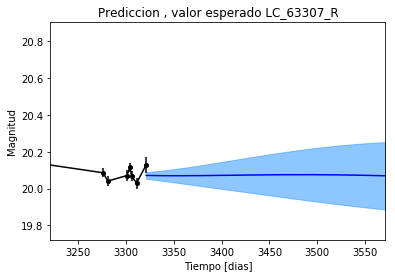

In [11]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_63307_R')

Text(0.5,1,'Prediccion, Caminos simulados  LC_63307_R')

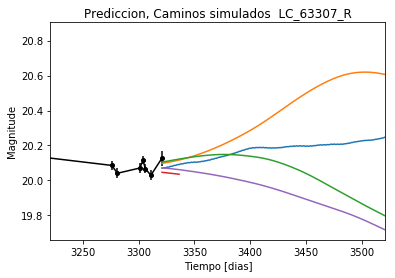

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_63307_R')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_63307_R')

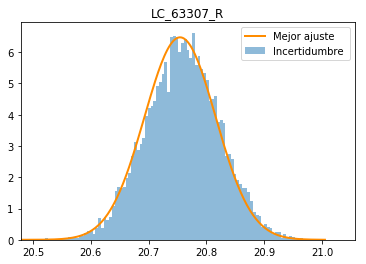

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_63307_R')

Text(0.5,1,'Interpolacion, camino simulado LC_63307_R')

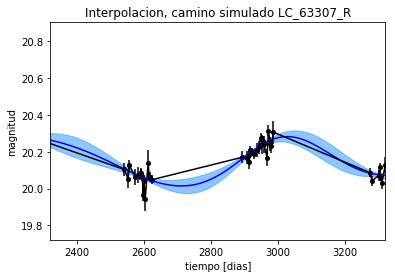

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63307_R')

Text(0.5,1,'Interpolacion, camino simulado LC_63307_R')

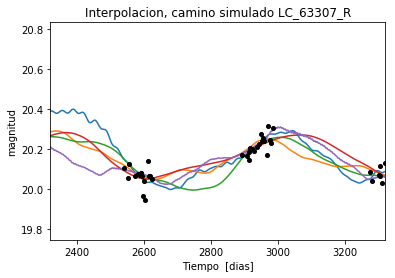

In [15]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_63307_R')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1358.87478947
Median: 0.0044704944432
Standard deviation: 0.0979200880271
68% credibility interval: [ 0.0005619  0.074068 ]
95% credibility interval: [  3.19718606e-04   3.91879697e-01]
99% credibility interval: [  3.05387130e-04   5.02531214e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 541.483058078
Median: 0.000814778138258
Standard deviation: 0.0377211968868
68% credibility interval: [ 0.00039157  0.00651858]
95% credibility interval: [ 0.0003111   0.08555197]
99% credibility interval: [ 0.00030339  0.30042143]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 563.731381686
Median: 0.00417916586925
Standard deviation

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1643.47294293
Median: 97.5186090786
Standard deviation: 1.53644672847
68% credibility interval: [ 95.82002269  98.57832501]
95% credibility interval: [ 93.39414521  99.18708795]
99% credibility interval: [ 91.28595164  99.65844243]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 602.853549347
Median: 0.271401931944
Standard deviation: 0.949895136119
68% credibility interval: [ 0.03045469  1.51769796]
95% credibility interval: [ 0.01198094  3.19834313]
99% credibility interval: [ 0.00936338  4.52354208]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 553.955121355
Median: 0.0366906725083
Standard deviation: 1.69250738972
68% credibility interval: [ 0.00205219  0.7380787 ]
95% credibility interval: [  1.70680012e

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2136.05097861
Median: 2.87471686126e-37
Standard deviation: 6.2878437453e+147
68% credibility interval: [  9.18785266e-93   6.78402002e-09]
95% credibility interval: [  6.56523957e-159   6.30989853e+116]
99% credibility interval: [  1.69514362e-174   2.19710844e+126]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2845.26685064
Median: 20.1563481645
Standard deviation: 0.20160326982
68% credibility interval: [ 20.00689461  20.33420409]
95% credibility interval: [ 19.80593876  20.61804012]
99% credibility interval: [ 19.58028398  20.91731965]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 720.191708513
Median: 0.000572434278062
Standard deviation: 0.0993482967049
68% credibility interval: [ 0.          0.10217745]
95% credibility interval: [ 0.          0.38825907]
99% credibility interval: [ 0.          0.48778189]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 720.191708513
Median: 0.000572434278062
Standard deviation: 0.0993482967049
68% credibility interval: [ 0.          0.10217745]
95% credibility interval: [ 0.          0.38825907]
99% credibility interval: [ 0.          0.48778189]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 745.073730969
Median: 0.0
Standard deviation: 0.000283922016638


In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1643.47294293
Median: 97.5186090786
Standard deviation: 1.53644672847
68% credibility interval: [ 95.82002269  98.57832501]
95% credibility interval: [ 93.39414521  99.18708795]
99% credibility interval: [ 91.28595164  99.65844243]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1030.49408713
Median: 0.120734213036
Standard deviation: 0.151118664241
68% credibility interval: [ 0.06570907  0.24451077]
95% credibility interval: [ 0.04133484  0.56435288]
99% credibility interval: [ 0.03184708  0.93437243]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 3738.41776218
Median: 1.07562469952
Standard deviation: 0.168070165526
68% credibility interval: [ 0.92924228  1.25024696]
95% credibility interval: [ 0.81481481  1.47769094]
99% credibility interval: [ 0.75373713  1.63364714]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1541.05139511
Median: 6.13269979544e-06
Standard deviation: 0.000961839697857
68% credibility interval: [  2.62760484e-07   1.34148467e-04]
95% credibility interval: [  6.44398452e-123   1.21681379e-003]
99% credibility interval: [  5.66719740e-133   2.44833940e-003]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1358.87478947
Median: (-0.0280889450013-0.717542188765j)
Standard deviation: 0.876463310448
68% credibility interval: [-0.46538296+0.j         -0.00353049-0.00793914j]
95% credibility interval: [ -2.46225275e+00+0.j          -2.00885125e-03-0.00284506j]
99% credibility interval: [ -3.15749674e+00+0.j        -1.91880393e-03-0.006148j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 541.483058078
Median: (-0.00511940202692+0j)
Standard deviation: 0.66770404696
68% credibility interval: [-0.04095747+2.44447j -0.00246028+0.j     ]
95% credibility interval: [-0.53753891+2.06581108j -0.00195469+0.00494093j]
99% credibility interval: [-1.88760353+1.47124362j -0.00190623+0.j        ]
Posterior summary for parameter ar_roots  e